In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load data from Excel into a pandas DataFrame
df = pd.read_excel(r"C:\Users\dishn\OneDrive\Desktop\Urban Mobility\Project\590 Project Data.xlsx")

In [3]:
# Select latitude and longitude columns as features
X = df[['Latitude', 'Longitude']]

In [4]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Apply K-means clustering with 7 clusters
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_scaled)

C:\Users\dishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [6]:
# Assign each station to a cluster
df['Cluster'] = kmeans.labels_

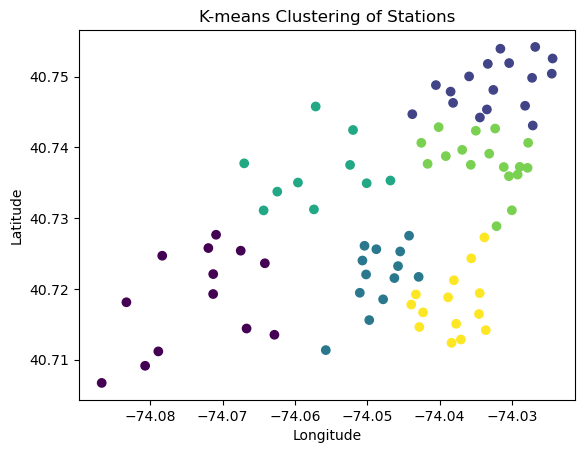

In [7]:
# Visualize the clusters (optional)
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering of Stations')
plt.show()

In [8]:
# Optional: Output the centroids of the clusters
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
for i, centroid in enumerate(centroids):
    print(f"Centroid for Cluster {i+1}: Latitude={centroid[0]}, Longitude={centroid[1]}")

Centroid for Cluster 1: Latitude=40.71857308134905, Longitude=-74.07344508128357
Centroid for Cluster 2: Latitude=40.7487587048486, Longitude=-74.03238709360369
Centroid for Cluster 3: Latitude=40.72168044558738, Longitude=-74.04836968817402
Centroid for Cluster 4: Latitude=40.736477188399284, Longitude=-74.05691298559213
Centroid for Cluster 5: Latitude=40.73796440446106, Longitude=-74.0337482087365
Centroid for Cluster 6: Latitude=40.71786917790467, Longitude=-74.0381575968388


In [9]:
# Save the DataFrame to an Excel file with the clustered data
df.to_excel(r"C:\Users\dishn\OneDrive\Desktop\Urban Mobility\Project\clustered_data_2.xlsx", index=False)